In [1]:
%matplotlib inline

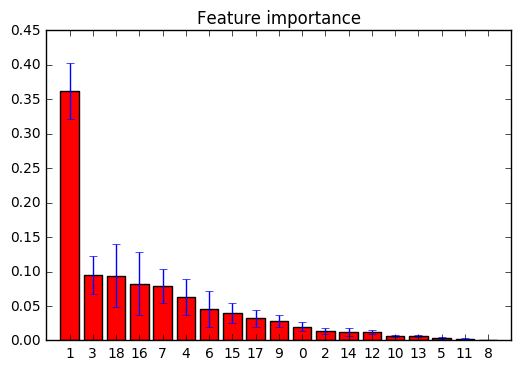

Key
1 background_flow_count
3 avg_duration
18 n_tcp
16 n_dports<1024
7 n_conn
4 n_s_b_p_address
6 n_sports>1024
15 normal_flow_count
17 n_d_b_p_address
9 n_udp
0 n_dports>1024
2 n_s_a_p_address
14 n_d_c_p_address
12 n_d_a_p_address
10 n_icmp
13 n_s_c_p_address
5 n_sports<1024
11 n_d_na_p_address
8 n_s_na_p_address


In [2]:
from utils import get_classifier, get_binetflow_files, get_saved_data, \
get_feature_labels, get_feature_order
import numpy as np
import matplotlib.pyplot as plt


binet_files = get_binetflow_files()
rf = get_classifier('rf')
feature, label = get_feature_labels(get_saved_data(0.15, binet_files[-1]))

rf.fit(feature, label)

importances = rf.feature_importances_

std = np.std([t.feature_importances_ for t in rf.estimators_],
            axis=0)

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importance")
plt.bar(range(feature.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(feature.shape[1]), indices)
plt.xlim([-1, feature.shape[1]])
plt.show()

orders = get_feature_order()
print("Key")
for i in indices:
    print(i, orders[i])
